<a href="https://colab.research.google.com/github/AhohPerisic/kmg/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_A_ing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사인함수 분류하기


In [ ]:
import math
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 2000) # x 범위
print(x)

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])


In [ ]:
y = torch.sin(x) # y sign 함수 불러오기
print(y)

tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1430e-03, -8.7423e-08])


In [ ]:
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

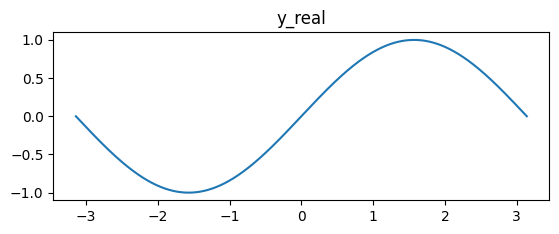

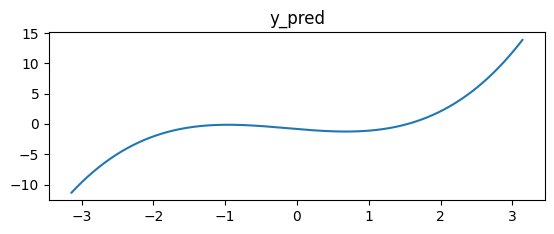

In [ ]:
y_pred = a*x**3 + b*x**2 + c *x + d

plt.subplot(2, 1, 2)
plt.title("y_real")
plt.plot(x, y)

plt.show()

plt.subplot(2, 1, 2)
plt.title("y_pred")
plt.plot(x, y_pred)


plt.show()

In [ ]:
lr = 1e-6
epochs = 2000

y_pred = a*x**3 + b*x**2 + c *x + d
loss = (y_pred - y).pow(2).sum()
print(loss)

grad_y_pred = 2*(y_pred - y)*x
grad_a = (grad_y_pred*x**3).sum()/2000
grad_b = (grad_y_pred*x**2).sum()/2000
grad_c = (grad_y_pred*x).sum()/2000
grad_d = grad_y_pred.sum()/2000



tensor(35958.0469)


epoch = 0, loss = 2.547348539231437e+18
epoch = 100, loss = 2.675748957367304e+18
epoch = 200, loss = 2.807338508979536e+18
epoch = 300, loss = 2.9421180187018527e+18
epoch = 400, loss = 3.0800874865342546e+18
epoch = 500, loss = 3.2212466375988347e+18
epoch = 600, loss = 3.365594647261872e+18
epoch = 700, loss = 3.5131337145466225e+18
epoch = 800, loss = 3.663861915307737e+18
epoch = 900, loss = 3.81777979930103e+18
epoch = 1000, loss = 3.974887366526501e+18
epoch = 1100, loss = 4.135184891862057e+18
epoch = 1200, loss = 4.298672100429791e+18
epoch = 1300, loss = 4.4653492671076106e+18
epoch = 1400, loss = 4.635216666773422e+18
epoch = 1500, loss = 4.80827210040397e+18
epoch = 1600, loss = 4.984518866534138e+18
epoch = 1700, loss = 5.16395476614067e+18
epoch = 1800, loss = 5.34658034897938e+18
epoch = 1900, loss = 5.532396164806083e+18


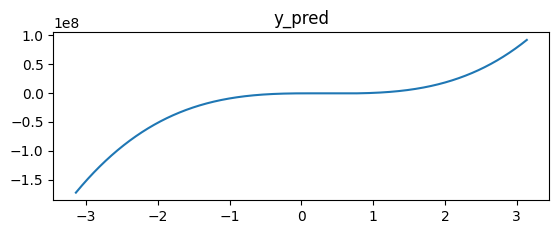

In [ ]:
for epoch in range(epochs):
  y_pred = a*x**3 + b*x**2 + c *x + d
  loss = (y_pred - y).pow(2).sum()
  a -= lr*grad_a
  b -= lr*grad_b
  c -= lr*grad_c
  d -= lr*grad_d
  if epoch % 100 == 0 :
    print("epoch = {0}, loss = {1}".format(epoch, loss.item()))

plt.subplot(2, 1, 2)
plt.title("y_pred")
plt.plot(x, y_pred)

plt.show()

# Logistic regression


In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

y=df.iloc[0:100,4].values

In [ ]:
x = df.iloc[0:100, [0,2]].values
x.shape

(100, 2)

In [ ]:
import torch

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)



In [ ]:
lr = 1e-2
epochs = 2000

grad_y_pred = 2*(y_pred - y)

grad_a = (grad_y_pred*x**3).sum()/2000
grad_b = (grad_y_pred*x**2).sum()/2000
grad_c = (grad_y_pred*x).sum()/2000


for epoch in range(epochs):
  y_pred = 1e**x / 1 + 1e**x
  loss = -y_pred
  a -= lr*grad_a
  b -= lr*grad_b
  c -= lr*grad_c
  if epoch % 100 == 0 :
    print("epoch = {0}, loss = {1}".format(epoch, loss.item()))


SyntaxError: invalid decimal literal (<ipython-input-56-a9174a67010e>, line 5)

[ 8.72969532  3.22106244 11.36458783 -1.33810705  6.70737579  3.94030189
  0.42449727  1.57562834  5.7102452   1.17018291  5.54708213  6.04733273
  1.45793309  4.7377042   6.30060004  9.03422102 12.2208351  10.19741309
  5.70242119  1.16658016]


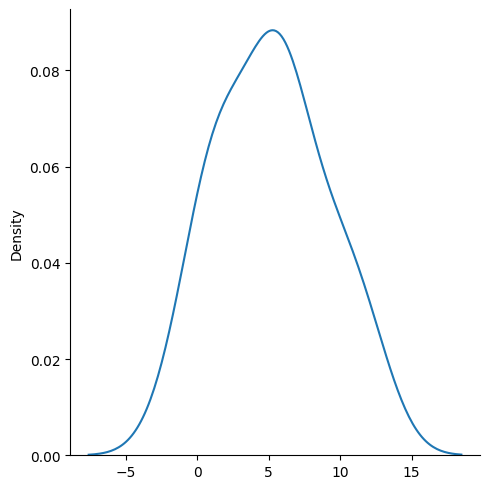

In [ ]:
from numpy import random

x_list = random.logistic(loc=5, scale=2, size=20)

print(x_list)

import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x_list, kind="kde")
plt.show()

In [ ]:
y = y.view(-1, 1)  # 타겟 텐서의 모양을 (batch_size, 1)로 변경


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return sigmoid(self.linear(x))

# 데이터 생성 및 텐서로 변환
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 모델 초기화
model = LogisticRegression(input_size=2)

# loss 함수와 최적화 함수 만들기
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

# 학습
epochs = 2000
for epoch in range(epochs):
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward pass 및 파라미터 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 로그 출력
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')


<ipython-input-26-3681d531052b>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
<ipython-input-26-3681d531052b>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


ValueError: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.